In [1]:
# 1. 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 런타임 다시 시작
# 이 코드 셀 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 클릭하세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (44.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and direc

/tmp/ipython-input-1-1599378403.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipython-input-1-1599378403.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


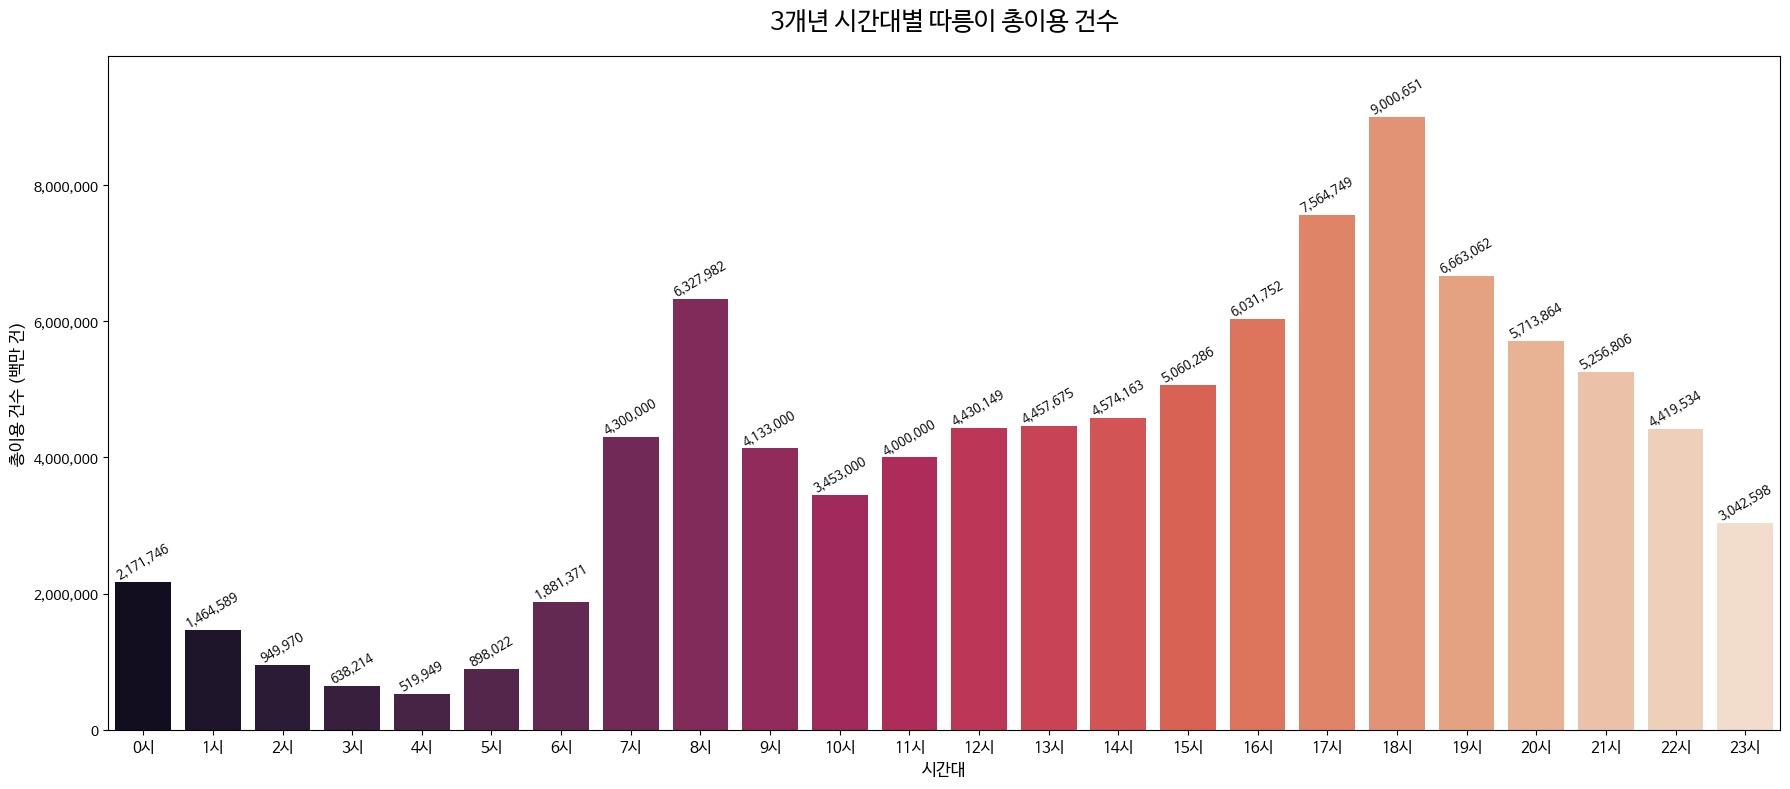

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

# 1. 한글 폰트 설정 (런타임 다시 시작 후에 실행)
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

# 2. 제공된 시간대별 데이터를 문자열로 준비
csv_data = """시간대,3개년 총합계 (2021~2023년)
18시,"9,000,651"
17시,"7,564,749"
19시,"6,663,062"
8시,"6,327,982"
16시,"6,031,752"
20시,"5,713,864"
15시,"5,060,286"
21시,"5,256,806"
14시,"4,574,163"
12시,"4,430,149"
13시,"4,457,675"
11시,"4,000,000"
22시,"4,419,534"
7시,"4,300,000"
9시,"4,133,000"
10시,"3,453,000"
23시,"3,042,598"
6시,"1,881,371"
0시,"2,171,746"
1시,"1,464,589"
5시,"898,022"
2시,"949,970"
3시,"638,214"
4시,"519,949"
총합계,"96,718,135"
"""

# 3. 문자열 데이터를 DataFrame으로 읽기
df = pd.read_csv(io.StringIO(csv_data), thousands=',')

# 4. 데이터 전처리
# (중요) 시각화를 위해 '총합계' 행 제외
df_filtered = df[df['시간대'] != '총합계'].copy()

# (중요) 시간의 흐름에 따라 정렬하기 위한 처리
# '시간대' 컬럼에서 '시'를 제거하고 숫자형으로 변환하여 새로운 정렬용 컬럼 생성
df_filtered['hour_numeric'] = df_filtered['시간대'].str.replace('시', '').astype(int)
# 숫자형으로 변환된 시간(hour_numeric)을 기준으로 오름차순 정렬
df_sorted = df_filtered.sort_values(by='hour_numeric')


# 5. 막대그래프 시각화
plt.figure(figsize=(18, 8)) # 시간대는 막대가 많으므로 가로 길이를 더 길게 설정
barplot = sns.barplot(
    x='시간대',
    y='3개년 총합계 (2021~2023년)',
    data=df_sorted,
    palette='rocket' # 다른 색상 테마 적용
)

# 그래프 제목 및 축 레이블 설정
plt.title('3개년 시간대별 따릉이 총이용 건수', fontsize=18, pad=20)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('총이용 건수 (백만 건)', fontsize=12) # 단위 표시를 명확하게
plt.xticks(fontsize=11)

# y축 단위를 더 읽기 쉽게 변경
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Y축의 최댓값을 10% 늘려 숫자 표시 공간 확보
plt.ylim(0, df_sorted['3개년 총합계 (2021~2023년)'].max() * 1.1)

# 각 막대 위에 숫자(총이용 건수)를 표시
for p in barplot.patches:
    height_str = f'{int(p.get_height()):,}'
    plt.text(
        p.get_x() + p.get_width() / 2.,
        p.get_height(),
        height_str,
        ha='center',
        va='bottom',
        fontsize=9, # 막대가 많아 글자가 겹칠 수 있으므로 폰트 크기 조정
        rotation=30 # 숫자를 살짝 회전시켜 가독성 확보
    )

plt.tight_layout()
plt.show()